# Data Preparation

In [41]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import scipy.stats as stats  # For statistical functions

In [42]:
# Import feature selection and preprocessing modules from scikit-learn
from sklearn.feature_selection import SelectKBest, f_classif  # For selecting the best features based on ANOVA F-statistic
from sklearn.decomposition import PCA  # For dimensionality reduction using Principal Component Analysis
from sklearn.preprocessing import StandardScaler  # For standardizing features by removing the mean and scaling to unit variance
from sklearn.preprocessing import OneHotEncoder  # For converting categorical variables into a form that can be provided to ML algorithms
from sklearn.preprocessing import LabelEncoder  # For encoding target labels with a value between 0 and n_classes-1
from sklearn.preprocessing import OrdinalEncoder  # For encoding ordinal categorical features with integer values

In [43]:
import os  # For interacting with the operating system
import sys  # For system-specific parameters and functions

# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

In [44]:
pd.set_option('display.max_columns', 200)  # Maximum columns to display
pd.set_option('display.max_rows', 200)     # Maximum rows to display

In [45]:
df = pd.read_csv('../data/cleaned_data.csv', low_memory=False, index_col=False)

In [46]:
df.head(10)

,Unnamed: 0,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,bodytype,NumberOfDoors,VehicleIntroDate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,SumInsured,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,NaN,Yes,No,119300,More than 6 months,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,NaN,Yes,No,119300,More than 6 months,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,NaN,Yes,No,119300,More than 6 months,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,NaN,Yes,No,119300,More than 6 months,119300.00,Monthly,220.1628,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,54.824561,0.0
4,4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,NaN,Yes,No,119300,More than 6 months,119300.00,Monthly,220.1628,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
5,5,145247,12827,2015-01-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,NaN,Yes,No,119300,More than 6 months,500000.00,Monthly,57.5412,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,3.256435,0.0
6,6,145247,12827,2015-04-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,NaN,Yes,No,119300,More than 6 months,500000.00,Monthly,57.5412,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Co

In [7]:
# Check for missing values in each column of the DataFrame
missing_counts = df.isnull().sum()

In [8]:
# Identify columns that have more than 1 missing value
columns_with_missing = missing_counts[missing_counts > 1].index
print(f'Columns with more than 1 missing value:\n{columns_with_missing}')

Columns with more than 1 missing value:
Index(['VehicleIntroDate'], dtype='object')


In [9]:
# Drop these columns from the DataFrame
df = df.drop(columns=columns_with_missing)

In [10]:
# Verify the result by printing the remaining columns
print(f'Columns remaining after dropping:\n{df.columns}')

Columns remaining after dropping:
Index(['Unnamed: 0', 'UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding',
       'NewVehicle', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')


# Identify Unique Categories

In [14]:
# Get categorical columns from the DataFrame
categorical_columns = df.select_dtypes(include='object').columns

# Print the summary DataFrame
summary_df

,Column,DataType,NumUniqueValues
0,TransactionMonth,object,23
1,Citizenship,object,4
2,LegalType,object,6
3,Title,object,5
4,Language,object,1
5,Bank,object,11
6,AccountType,object,3
7,MaritalStatus,object,3
8,Gender,object,3
9,Country,object,1


In [15]:
# Create a summary DataFrame to hold information about categorical columns
summary_df = pd.DataFrame({
    'Column': categorical_columns,  # Column names
    'DataType': [df[col].dtype for col in categorical_columns],  # Data types of each column
    'NumUniqueValues': [df[col].nunique() for col in categorical_columns]  # Number of unique values in each column
})

# Data Insights Summary

## Key Insights

1. **Low Variability Columns**:
   - The following columns exhibit minimal variability:
     - **Language**
     - **Country**
     - **ItemType**
     - **StatutoryClass**
     - **StatutoryRiskType**
   - **Action**: These columns should be removed from the dataset.

2. **Model Complexity**:
   - The **Model** column contains **411 unique values**, which may complicate analysis.
   - **Action**: Consider reducing cardinality through grouping similar models or applying target encoding.

3. **Binary Columns**:
   - The following columns have only **2 unique values** each:
     - **AlarmImmobiliser**
     - **TrackingDevice**
     - **NewVehicle**
   - **Action**: Evaluate if these columns are necessary for the model or if they can be combined.

4. **Date Conversion**:
   - The **TransactionMonth** column should be converted to a proper date format.
   - **Action**: Extract useful features such as **year**, **month**, and **quarter** to enhance analysis.

5. **Numeric Features**:
   - The **CapitalOutstanding** column should be numeric and can be utilized as a continuous feature.
   - **Action**: Ensure it is correctly formatted for effective modeling.

## Recommendations
Follow the above actions to optimize the dataset for analysis and model training.

In [17]:
   columns_to_drop = ['Language', 'Country', 'ItemType', 'StatutoryClass', 'StatutoryRiskType']
   df = df.drop(columns=columns_to_drop)
   print(f"Dropped columns: {columns_to_drop}")

Dropped columns: ['Language', 'Country', 'ItemType', 'StatutoryClass', 'StatutoryRiskType']


Convert the `'CapitalOutstanding'` to numeric format

In [21]:
# Convert 'CapitalOutstanding' to numeric, coercing errors to handle non-numeric values (e.g., empty strings or NaNs)
df['CapitalOutstanding'] = pd.to_numeric(df['CapitalOutstanding'], errors='coerce')
print("Converted 'CapitalOutstanding' to numeric type. Any non-numeric values have been coerced to NaN.")

# Fill missing values if necessary, e.g., with 0 or the column's mean
df['CapitalOutstanding'] = df['CapitalOutstanding'].fillna(0)  # Alternatively, use the mean: df['CapitalOutstanding'].fillna(df['CapitalOutstanding'].mean())
print("Filled missing values in 'CapitalOutstanding' with 0. Any NaN values have been replaced.")

# Ensure it's a float type
df['CapitalOutstanding'] = df['CapitalOutstanding'].astype(float)
print("Converted 'CapitalOutstanding' to float type.")

# Verify the conversion and display the data type
print(f"The data type of 'CapitalOutstanding' is now: {df['CapitalOutstanding'].dtype}")

Converted 'CapitalOutstanding' to numeric type. Any non-numeric values have been coerced to NaN.
Filled missing values in 'CapitalOutstanding' with 0. Any NaN values have been replaced.
Converted 'CapitalOutstanding' to float type.
The data type of 'CapitalOutstanding' is now: float64


Convert boolean `'IsVATRegistered'` to integer

In [22]:
# Convert boolean 'IsVATRegistered' to integer (True becomes 1, False becomes 0)
df['IsVATRegistered'] = df['IsVATRegistered'].astype(int)
print("Converted 'IsVATRegistered' from boolean to integer type.")
print(f"The unique values in 'IsVATRegistered' are now: {df['IsVATRegistered'].unique()}")

Converted 'IsVATRegistered' from boolean to integer type.
The unique values in 'IsVATRegistered' are now: [1 0]


Convert the `'TransactionMonth'` to a datetime format and extract relevant features.

In [23]:
# Convert 'TransactionMonth' to datetime format
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
print("Converted 'TransactionMonth' to datetime format.")

# Extract the year from 'TransactionMonth' and create a new column 'TransactionYear'
df['TransactionYear'] = df['TransactionMonth'].dt.year
print("Extracted year from 'TransactionMonth' and created 'TransactionYear'.")

# Extract the month from 'TransactionMonth' and create a new column 'TransactionMonthOnly'
df['TransactionMonthOnly'] = df['TransactionMonth'].dt.month
print("Extracted month from 'TransactionMonth' and created 'TransactionMonthOnly'.")

# Extract the quarter from 'TransactionMonth' and create a new column 'TransactionQuarter'
df['TransactionQuarter'] = df['TransactionMonth'].dt.quarter
print("Extracted quarter from 'TransactionMonth' and created 'TransactionQuarter'.")

# Drop the original datetime column if it's no longer needed
df = df.drop(columns=['TransactionMonth'])
print("Dropped the original 'TransactionMonth' column as it is no longer needed.")

Converted 'TransactionMonth' to datetime format.
Extracted year from 'TransactionMonth' and created 'TransactionYear'.
Extracted month from 'TransactionMonth' and created 'TransactionMonthOnly'.
Extracted quarter from 'TransactionMonth' and created 'TransactionQuarter'.
Dropped the original 'TransactionMonth' column as it is no longer needed.


Check the Distribution of `'Title'`, `'MaritalStatus'`, and `'Gender'`

In [24]:
print(f'Gender Distribution:\n{df.Gender.value_counts()}')
print(f'Title Distribution:\n {df.Title.value_counts()}')
print(f'Marital Status Distribution:\n {df.MaritalStatus.value_counts()}')

Gender Distribution:
Gender
Not specified    950526
Male              42817
Female             6755
Name: count, dtype: int64
Title Distribution:
 Title
Mr      933555
Mrs      45850
Ms       13269
Miss      6614
Dr         810
Name: count, dtype: int64
Marital Status Distribution:
 MaritalStatus
Not specified    994467
Single             4254
Married            1377
Name: count, dtype: int64


# Gender Imputation Analysis

## High Proportion of Unspecified Gender

A significant portion of the Gender values in the dataset is missing or unspecified, totaling **950,526** entries. 

To improve the quality of the data, these unspecified gender values can be filled using information from the Title column where available.

## Title-to-Gender Mapping

Certain titles provide a clear indication of gender:

- **Mr**: Male
- **Mrs, Miss, Ms**: Female
- **Dr**: Ambiguous (leave as Not Specified)

## Approach to Impute Missing Genders Using Titles

1. **Mr** → Male
2. **Mrs, Miss, Ms** → Female
3. **Dr** → Leave as Not Specified (since it’s ambiguous)

By using this mapping, we can effectively impute missing gender values based on the available titles in the dataset.

In [25]:
# Map Titles to Gender
title_to_gender_map = {
    'Mr': 'Male',
    'Mrs': 'Female',
    'Ms': 'Female',
    'Miss': 'Female',
    'Dr': None  # Leave as None since it could be either gender
}

# Fill missing Gender values based on the Title column
df['Gender'] = df.apply(lambda row: title_to_gender_map.get(row['Title'], row['Gender']), axis=1)
print("Filled missing Gender values based on Title mapping.")

# Display the updated Gender counts
print("Updated Gender Distribution:\n", df['Gender'].value_counts())

Filled missing Gender values based on Title mapping.
Updated Gender Distribution:
 Gender
Male      933555
Female     65733
Name: count, dtype: int64


## Balanced Gender Distribution

After imputing missing gender values based on the Title column, the number of male and female entries is now significantly more balanced. This improvement is notable compared to the initial state, where a large portion of the Gender values were unspecified. 

This balanced distribution enhances the dataset's reliability and allows for more accurate analyses and insights.

Dropping the `'MaritalStatus'` column is a reasonable decision given the high proportion of unspecified values

In [26]:
# Drop the 'MaritalStatus' column from the DataFrame
df = df.drop(columns=['MaritalStatus'])
print("Dropped the 'MaritalStatus' column from the DataFrame as it is no longer needed.")

Dropped the 'MaritalStatus' column from the DataFrame as it is no longer needed.


In [27]:
# Drop the specified columns from the DataFrame
df = df.drop(columns=['Unnamed: 0', 'UnderwrittenCoverID', 'PolicyID'])
print("Dropped the following columns from the DataFrame: 'Unnamed: 0', 'UnderwrittenCoverID', 'PolicyID'.")

Dropped the following columns from the DataFrame: 'Unnamed: 0', 'UnderwrittenCoverID', 'PolicyID'.


## Encoding Strategy

To effectively handle categorical variables in the dataset, the following encoding strategies are employed:

1. **Label Encoding**: 
   - Used for binary or low-cardinality features.
   - Converts categories into numerical labels.

2. **One-Hot Encoding**: 
   - Applied to moderate cardinality features where the number of resulting columns remains manageable.
   - Creates binary columns for each category.

3. **Target Encoding**: 
   - Suitable for high cardinality features to reduce the number of new features while capturing useful patterns.
   - Replaces categories with the average of the target variable for each category.

4. **Frequency Encoding**: 
   - Another approach for high cardinality features.
   - Replaces categories with their frequency in the dataset, providing a numerical representation of their occurrence.

This encoding strategy ensures that categorical variables are transformed appropriately for analysis and modeling.

In [28]:
# Define cardinality thresholds
low_cardinality_threshold = 10
high_cardinality_threshold = 20

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Separate features by cardinality
low_cardinality_features = [col for col in categorical_cols if df[col].nunique() <= low_cardinality_threshold]
moderate_cardinality_features = [col for col in categorical_cols if low_cardinality_threshold < df[col].nunique() <= high_cardinality_threshold]
high_cardinality_features = [col for col in categorical_cols if df[col].nunique() > high_cardinality_threshold]

# Label Encoding for low cardinality features
label_encoders = {}
for feature in low_cardinality_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le
    print(f"Label encoded feature: {feature}")

# One-Hot Encoding for moderate cardinality features
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)
for feature in moderate_cardinality_features:
    encoded = one_hot_encoder.fit_transform(df[[feature]])
    encoded_df = pd.DataFrame(encoded, columns=one_hot_encoder.get_feature_names_out([feature]))
    df = pd.concat([df, encoded_df], axis=1)
    df = df.drop(columns=[feature])
    print(f"One-hot encoded feature: {feature}")

# Frequency Encoding for high cardinality features
for feature in high_cardinality_features:
    freq = df[feature].value_counts()
    df[feature + '_freq'] = df[feature].map(freq)
    df = df.drop(columns=[feature])
    print(f"Frequency encoded feature: {feature}")

Label encoded feature: Citizenship
Label encoded feature: LegalType
Label encoded feature: Title
Label encoded feature: AccountType
Label encoded feature: Gender
Label encoded feature: Province
Label encoded feature: VehicleType
Label encoded feature: AlarmImmobiliser
Label encoded feature: TrackingDevice
Label encoded feature: NewVehicle
Label encoded feature: TermFrequency
Label encoded feature: Section
Label encoded feature: Product
One-hot encoded feature: Bank
One-hot encoded feature: MainCrestaZone
One-hot encoded feature: bodytype
One-hot encoded feature: ExcessSelected
One-hot encoded feature: CoverGroup
Frequency encoded feature: SubCrestaZone
Frequency encoded feature: make
Frequency encoded feature: Model
Frequency encoded feature: CoverCategory
Frequency encoded feature: CoverType


In [29]:
# Verify the transformations
df.head()

,IsVATRegistered,Citizenship,LegalType,Title,AccountType,Gender,Province,PostalCode,mmcode,VehicleType,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,SumInsured,TermFrequency,CalculatedPremiumPerTerm,Section,Product,TotalPremium,TotalClaims,TransactionYear,TransactionMonthOnly,TransactionQuarter,Bank_Capitec Bank,Bank_First National Bank,Bank_FirstRand Bank,Bank_Investec Bank,Bank_Ithala Bank,Bank_Mercantile Lisbon Bank,Bank_Nedbank,Bank_Old Mutual,Bank_RMB Private Bank,Bank_Standard Bank,MainCrestaZone_Cape Province (Cape Town),MainCrestaZone_Cape Province (East and North of Cape Town),"MainCrestaZone_Ciskei, Cape Mid 1",MainCrestaZone_East London,MainCrestaZone_Johannesburg,MainCrestaZone_Karoo 1 (Northeast of Cape Town),"MainCrestaZone_Langkloof, Coast 2, Coast 1",MainCrestaZone_Natal,MainCrestaZone_Natal (Durban),MainCrestaZone_Oranje Free State,MainCrestaZone_Port Elizabeth,MainCrestaZone_Rand East,"MainCrestaZone_Tembu 2, Cape Mid 2, Cape Mid West, Tembu 1",MainCrestaZone_Transvaal (Pretoria),MainCrestaZone_Transvaal (all except Pretoria),bodytype_C/C,bodytype_C/P,bodytype_CCL,bodytype_D/C,bodytype_D/S,bodytype_H/B,bodytype_MPV,bodytype_P/V,bodytype_S/C,bodytype_S/D,bodytype_S/W,bodytype_SUV,ExcessSelected_Mobility - Metered Taxis - R2000,ExcessSelected_Mobility - Metered Taxis - R5000,ExcessSelected_Mobility - R250,ExcessSelected_Mobility - Taxi with value less than R100 000 - R3 000,ExcessSelected_Mobility - Taxi with value more than R100 000 - R10 000,ExcessSelected_Mobility - Taxi with value more than R100 000 - R5 000,ExcessSelected_Mobility - Taxi with value more than R100 000 - R5 000 (April),ExcessSelected_Mobility - Taxi with value more than R100 000 - R7 500,ExcessSelected_Mobility - Trailers,ExcessSelected_Mobility - Windscreen,ExcessSelected_Mobility - Windscreen (Feb2015),ExcessSelected_No excess,CoverGroup_Asset Value Preserver,CoverGroup_Baggage/Luggage,CoverGroup_Basic Excess Waiver,CoverGroup_Cash Takings,CoverGroup_Comprehensive - Taxi,CoverGroup_Credit Protection,CoverGroup_Deposit Cover,"CoverGroup_Fire,Theft and Third Party",CoverGroup_Income Protector,CoverGroup_Motor Comprehensive,CoverGroup_Standalone passenger liability,CoverGroup_Third Party Only,CoverGroup_Trailer,SubCrestaZone_freq,make_freq,Model_freq,CoverCategory_freq,CoverType_freq
0,1,0,0,2,0,1,2,1459,44069150.0,4,2004,6.0,2597.0,130.0,4.0,1,0,119300.0,1,0.01,1,25.0000,1,2,21.929825,0.0,2015,3,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42168,41940,180,97313,103763
1,1,0,0,2,0,1,2,1459,44069150.0,4,2004,6.0,2597.0,130.0,4.0,1,0,119300.0,1,0.01,1,25.0000,1,2,21.929825,0.0,2015,5,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42168,41940,180,97313,103763
2,1,0,0,2,0,1,2,1459,44069150.0,4,2004,6.0,2597.0,130.0,4.0,1,0,119300.0,1,0.01,1,25.0000,1,2,0.000000,0.0,2015,7,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42168,41940,180,97313,103763
3,1,0,0,2,0,1,2,1459,44069150.0,4,2004,6.0,2597.0,130.0,4.0,1,0,119300.0,1,119300.00,1,220.1628,1,2,54.824561,0.0,2015,5,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42168,41940,180,8776,104183
4,1,0,0,2,0,1,2,1459,44069150.

Create new feature from `'TotalPremium'` and `'TotalClaims'`

In [30]:
# Calculate the Premium to Claims Ratio
df['Premium_to_Claims_Ratio'] = df['TotalPremium'] / (df['TotalClaims'] + 1)
print("Calculated 'Premium_to_Claims_Ratio' for the DataFrame.")

Calculated 'Premium_to_Claims_Ratio' for the DataFrame.


## Scaling Before Feature Selection

Feature scaling should typically be performed **before** feature selection. This ensures that all features are on a comparable scale, which is crucial when applying selection techniques like `SelectKBest`. Many of these methods rely on statistical techniques sensitive to scale, such as `f_classif` or `mutual_info_classif`.

If features have different ranges, those with larger scales may dominate the selection process, leading to a bias toward these features. By scaling before selection, each feature contributes fairly to the selection criteria, promoting a more balanced and effective feature selection process.

In [31]:
# Separate Target and Feature Variables
X = df.drop(columns=['TotalPremium', 'TotalClaims'])
y = df['TotalPremium']  # Target variable can also be 'TotalClaims'
print("Separated features (X) and target variable (y).")

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Scaled feature variables using StandardScaler.")

Separated features (X) and target variable (y).
Scaled feature variables using StandardScaler.


# Feature Selection and Dimensionality Reduction

In [32]:
# Feature Selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=20)  # Select top 20 features
X_new = selector.fit_transform(X_scaled, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]
print("Selected top 20 features:", selected_features.tolist())

Selected top 20 features: ['IsVATRegistered', 'RegistrationYear', 'CalculatedPremiumPerTerm', 'Product', 'Bank_Investec Bank', 'Bank_Mercantile Lisbon Bank', 'MainCrestaZone_Natal (Durban)', 'bodytype_C/P', 'bodytype_MPV', 'bodytype_S/D', 'ExcessSelected_Mobility - R250', 'ExcessSelected_Mobility - Trailers', 'ExcessSelected_Mobility - Windscreen', 'ExcessSelected_No excess', 'CoverGroup_Baggage/Luggage', 'CoverGroup_Cash Takings', 'CoverGroup_Comprehensive - Taxi', 'CoverGroup_Trailer', 'CoverCategory_freq', 'CoverType_freq']


## Reduce Dimensionality

In large datasets with many features, some features might be redundant or highly correlated. **Principal Component Analysis (PCA)** transforms these features into a smaller set of uncorrelated variables called **principal components**, which capture most of the variability in the data.

Using PCA can lead to:
- **Simpler models:** Fewer features mean a more straightforward model structure.
- **Faster training times:** Reducing dimensionality speeds up the training process.
- **Less risk of overfitting:** With fewer features, the model is less likely to fit noise in the data.

By applying PCA, you can improve the efficiency and performance of your machine learning models.

In [33]:
# Example: Dimensionality Reduction using PCA
pca = PCA(n_components=20)  # Reduce to 20 principal components
X_pca = pca.fit_transform(X_scaled)  # Use scaled features

print("Reduced dimensionality to 20 principal components.")

Reduced dimensionality to 20 principal components.


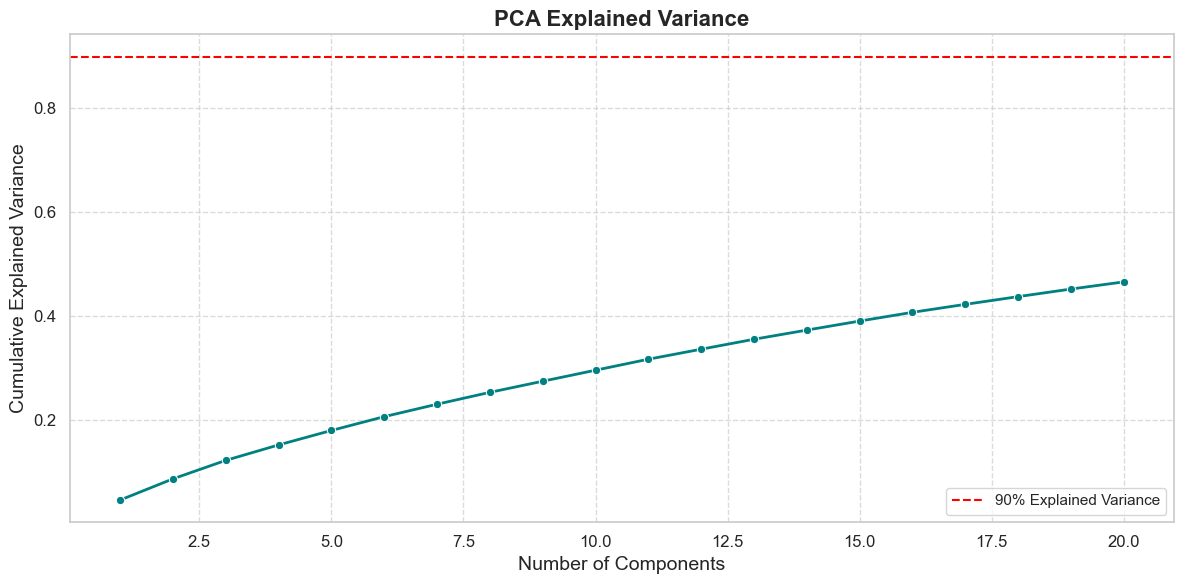

In [34]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plot explained variance
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, 21), y=np.cumsum(pca.explained_variance_ratio_), marker='o', color='teal', linewidth=2)

# Customize the aesthetics
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance', fontsize=14)
plt.title('PCA Explained Variance', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add a horizontal line for 90% explained variance
plt.axhline(y=0.90, color='red', linestyle='--', label='90% Explained Variance')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [47]:
# Get the names of the selected features
selected_features = X.columns[selector.get_support()]

# Display the selected features
print("Selected Features:")
for feature in selected_features:
    print(f"- {feature}")

Selected Features:
- IsVATRegistered
- RegistrationYear
- CalculatedPremiumPerTerm
- Product
- Bank_Investec Bank
- Bank_Mercantile Lisbon Bank
- MainCrestaZone_Natal (Durban)
- bodytype_C/P
- bodytype_MPV
- bodytype_S/D
- ExcessSelected_Mobility - R250
- ExcessSelected_Mobility - Trailers
- ExcessSelected_Mobility - Windscreen
- ExcessSelected_No excess
- CoverGroup_Baggage/Luggage
- CoverGroup_Cash Takings
- CoverGroup_Comprehensive - Taxi
- CoverGroup_Trailer
- CoverCategory_freq
- CoverType_freq


In [48]:
# Create new DataFrame with selected features
df_new = pd.DataFrame(X_new, columns=selected_features)

# Merge the target variable to the new DataFrame
df_new['TotalPremium'] = y

# Display the first few rows of the new DataFrame
print("New DataFrame with Selected Features and Target Variable:")
print(df_new.head())

New DataFrame with Selected Features and Target Variable:
   IsVATRegistered  RegistrationYear  CalculatedPremiumPerTerm   Product  \
0        14.074932         -1.908809                 -0.460139  3.248695   
1        14.074932         -1.908809                 -0.460139  3.248695   
2        14.074932         -1.908809                 -0.460139  3.248695   
3        14.074932         -1.908809                  1.888399  3.248695   
4        14.074932         -1.908809                  1.888399  3.248695   

   Bank_Investec Bank  Bank_Mercantile Lisbon Bank  \
0           -0.027064                    -0.011619   
1           -0.027064                    -0.011619   
2           -0.027064                    -0.011619   
3           -0.027064                    -0.011619   
4           -0.027064                    -0.011619   

   MainCrestaZone_Natal (Durban)  bodytype_C/P  bodytype_MPV  bodytype_S/D  \
0                      -0.300558     -0.025384     -0.187147      4.784029   
1   

In [50]:
# Save the new DataFrame to a CSV file for model training
df_new.to_csv('../data/preprocessed_data.csv', index=False)

# Confirmation message
print("New DataFrame saved to '../data/preprocessed_data.csv'.")

New DataFrame saved to '../data/preprocessed_data.csv'.


In [51]:
df_new.head()

,IsVATRegistered,RegistrationYear,CalculatedPremiumPerTerm,Product,Bank_Investec Bank,Bank_Mercantile Lisbon Bank,MainCrestaZone_Natal (Durban),bodytype_C/P,bodytype_MPV,bodytype_S/D,ExcessSelected_Mobility - R250,ExcessSelected_Mobility - Trailers,ExcessSelected_Mobility - Windscreen,ExcessSelected_No excess,CoverGroup_Baggage/Luggage,CoverGroup_Cash Takings,CoverGroup_Comprehensive - Taxi,CoverGroup_Trailer,CoverCategory_freq,CoverType_freq,TotalPremium
0,14.074932,-1.908809,-0.460139,3.248695,-0.027064,-0.011619,-0.300558,-0.025384,-0.187147,4.784029,-0.021521,-0.008718,3.045838,-1.946355,-0.013115,-0.01706,0.462091,-0.008718,0.374133,0.459047,21.929825
1,14.074932,-1.908809,-0.460139,3.248695,-0.027064,-0.011619,-0.300558,-0.025384,-0.187147,4.784029,-0.021521,-0.008718,3.045838,-1.946355,-0.013115,-0.01706,0.462091,-0.008718,0.374133,0.459047,21.929825
2,14.074932,-1.908809,-0.460139,3.248695,-0.027064,-0.011619,-0.300558,-0.025384,-0.187147,4.784029,-0.021521,-0.008718,3.045838,-1.946355,-0.013115,-0.01706,0.462091,-0.008718,0.374133,0.459047,0.000000
3,14.074932,-1.908809,1.888399,3.248695,-0.027064,-0.011619,-0.300558,-0.025384,-0.187147,4.784029,-0.021521,-0.008718,-0.328317,-1.946355,-0.013115,-0.01706,0.462091,-0.008718,-2.852745,0.478056,54.824561
4,14.074932,-1.908809,1.888399,3.248695,-0.027064,-0.011619,-0.300558,-0.025384,-0.187147,4.784029,-0.021521,-0.008718,-0.328317,-1.946355,-0.013115,-0.01706,0.462091,-0.008718,-2.852745,0.478056,0.000000


In [52]:

df_new.mean()

IsVATRegistered                        -1.965169e-17
RegistrationYear                       -1.841734e-14
CalculatedPremiumPerTerm               -2.069466e-16
Product                                -3.034004e-16
Bank_Investec Bank                      1.331427e-17
Bank_Mercantile Lisbon Bank             1.893411e-18
MainCrestaZone_Natal (Durban)           6.968320e-17
bodytype_C/P                           -8.326745e-18
bodytype_MPV                            2.907256e-17
bodytype_S/D                           -5.297288e-17
ExcessSelected_Mobility - R250         -2.589674e-18
ExcessSelected_Mobility - Trailers     -2.229109e-19
ExcessSelected_Mobility - Windscreen    4.527135e-17
ExcessSelected_No excess               -1.165176e-17
CoverGroup_Baggage/Luggage             -3.829450e-18
CoverGroup_Cash Takings                -2.058596e-17
CoverGroup_Comprehensive - Taxi        -1.182227e-16
CoverGroup_Trailer                     -2.229109e-19
CoverCategory_freq                      5.7747

In [53]:
df_new.std()

IsVATRegistered                          1.000000
RegistrationYear                         1.000000
CalculatedPremiumPerTerm                 1.000000
Product                                  1.000000
Bank_Investec Bank                       1.000000
Bank_Mercantile Lisbon Bank              1.000000
MainCrestaZone_Natal (Durban)            1.000000
bodytype_C/P                             1.000000
bodytype_MPV                             1.000000
bodytype_S/D                             1.000000
ExcessSelected_Mobility - R250           1.000000
ExcessSelected_Mobility - Trailers       1.000000
ExcessSelected_Mobility - Windscreen     1.000000
ExcessSelected_No excess                 1.000000
CoverGroup_Baggage/Luggage               1.000000
CoverGroup_Cash Takings                  1.000000
CoverGroup_Comprehensive - Taxi          1.000000
CoverGroup_Trailer                       1.000000
CoverCategory_freq                       1.000000
CoverType_freq                           1.000000


# Insurance Premium Prediction

## Overview
This project aims to predict insurance premiums using various features derived from customer data. A new DataFrame, `df_new`, has been created to include selected features that contribute effectively to model training.

## Selected Features
The new DataFrame includes the following features:

- **IsVATRegistered**: Indicates VAT registration status.
- **RegistrationYear**: The year of registration.
- **CalculatedPremiumPerTerm**: The calculated premium per term.
- **Product**: Type of insurance product.
- **Bank**: Features indicating the associated banks (e.g., Investec Bank, Mercantile Lisbon Bank).
- **MainCrestaZone**: Geographic zone of the customer.
- **Body Type**: Vehicle body types (e.g., C/P, MPV, S/D).
- **Excess Selected**: Various excess options for mobility coverage.
- **Cover Groups**: Different cover categories (e.g., baggage, cash takings, comprehensive).
- **Cover Frequency**: Frequency of coverage types.
- **TotalPremium**: Target variable representing the total premium.

## Descriptive Statistics
### Mean Values
The mean of the features indicates the average value across the dataset:

IsVATRegistered: -1.965169e-17
RegistrationYear: -1.841734e-14
TotalPremium: 1.486439e+01


### Standard Deviation
The standard deviation of features shows the variability:

TotalPremium: 21.969335

## Data Saving
The new DataFrame has been saved to a CSV file for further model training

../data/preprocessed_data.csv

## Conclusion
This dataset will be leveraged for building predictive models to determine insurance premiums based on the selected features.